In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
sns.set_style('whitegrid')
warnings.filterwarnings('ignore')

In [2]:
#read csv
raw_data = pd.read_csv('healthcare_dataset.csv')

### 1. Look up the column
 - Patient basic information: 
   - Name & Age & Gender
 - Medical information
   - Blood type
   - Medical Condition
   - Doctor & Hopital & Room Number
   - Insurance provider
   - Billding Amount
   - Admission type
   - Medication
   - Test result
 - Other information
   - Date of Admission
   - Discharge Date

In [3]:
raw_data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

In [5]:
print('Medical Condition: ->   ',raw_data['Medical Condition'].unique())
print('Test Results: ->   ',raw_data['Medical Condition'].unique())
print('Admission Type: ->   ',raw_data['Medical Condition'].unique())

Medical Condition: ->    ['Diabetes' 'Asthma' 'Obesity' 'Arthritis' 'Hypertension' 'Cancer']
Test Results: ->    ['Diabetes' 'Asthma' 'Obesity' 'Arthritis' 'Hypertension' 'Cancer']
Admission Type: ->    ['Diabetes' 'Asthma' 'Obesity' 'Arthritis' 'Hypertension' 'Cancer']


In [6]:
#check if whitespace in the columns
cols_with_blank = [col for col in raw_data.columns if (raw_data[col] == " ").any()]
print(cols_with_blank)

[]


### 2 Data cleaning

In [7]:
task_col = ['Medical Conition', 'Test Result', 'Billing Amount']

In [8]:
raw_data.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [9]:
print(raw_data['Medical Condition'].value_counts(),'\n')
print(raw_data['Test Results'].value_counts())

Asthma          1708
Cancer          1703
Hypertension    1688
Arthritis       1650
Obesity         1628
Diabetes        1623
Name: Medical Condition, dtype: int64 

Abnormal        3456
Inconclusive    3277
Normal          3267
Name: Test Results, dtype: int64


##### The raw data appears to be relatively clean, and no significant data quality issues were detected during initial inspection. As a result, no extensive preprocessing or data cleaning steps were required.

In [10]:
#copy the raw data to new dataframe and named data
data = raw_data.copy()

### 3. EDA

### Gender vs Test Results Distribution

The distribution of test results for **females** is relatively balanced across the three categories (Inconclusive, Normal, Abnormal).  

In contrast, **males** show a noticeably higher count in the **Abnormal** category.  
This may suggest that male patients are more likely to be affected by certain medical conditions that are more prone to generating abnormal test results.

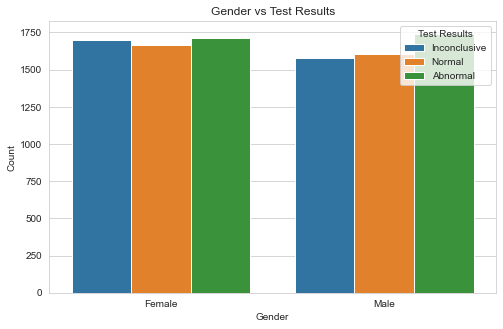

<Figure size 432x288 with 0 Axes>

In [12]:
plt.figure(figsize=(8,5))
sns.countplot(data=data, x='Gender', hue='Test Results')
plt.title("Gender vs Test Results")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()
plt.savefig("img/Gender vs Test Results")

### Gender vs Medical Condition

From the chart below, we observe that **female patients** are more frequently diagnosed with **Asthma** and **Cancer** compared to male patients.  
For other medical conditions, the distribution among females is relatively balanced.

In contrast, **male patients** show a more uneven distribution across diseases, with higher counts in **Asthma**, **Arthritis**, **Hypertension**, and **Cancer**.

This suggests that the observed difference in **Test Result** (seen in the previous chart) may not be directly caused by the type of medical condition itself.  
In fact, female patients appear to have more severe or frequent illnesses overall.

This raises an important hypothesis:  
> Could the **age factor** be responsible for the higher abnormal results among males?  
Given that male patients might generally be older, age-related decline in immune function may lead to more pronounced abnormal test outcomes.


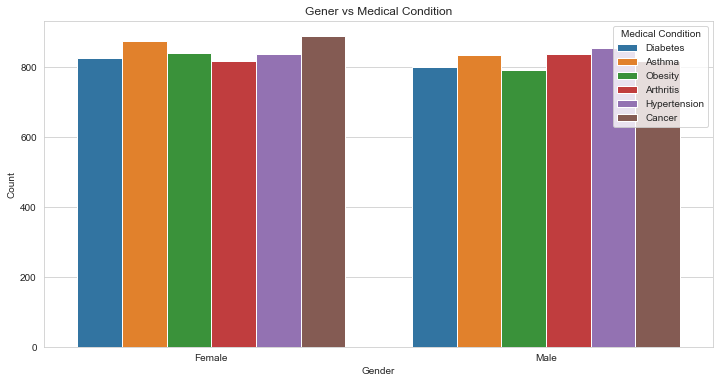

<Figure size 432x288 with 0 Axes>

In [13]:
plt.figure(figsize=(12,6))
sns.countplot(data=data, x='Gender', hue='Medical Condition')
plt.title("Gener vs Medical Condition")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()
plt.savefig("img/Gender vs Medical Condition.png")

### Age Distribution by Gender and Test Results

As shown in the boxplot above, the **average age of female patients** is very consistent across all Test Result(Inconclusive, Normal, Abnormal), hovering around **52–53 years**.

Among **male patients**, the average age for those with **Normal** Test Results appears slightly higher than for those with Abnormal or Inconclusive results.

These observations suggest that **age is not the driving factor** behind the higher proportion of abnormal test results observed in male patients.  
If age were the main cause, we would expect patients with abnormal results to be consistently older, which is not supported by this distribution.

Thus, other factors such as **underlying medical conditions, genetic predisposition, or treatment response differences between genders** may play a more significant role.

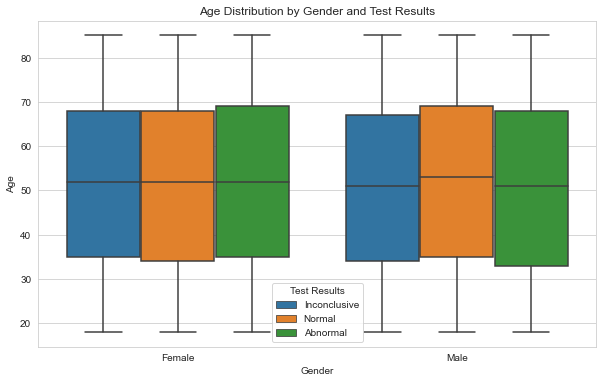

<Figure size 432x288 with 0 Axes>

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="Gender", y="Age", hue="Test Results")
plt.title("Age Distribution by Gender and Test Results")
plt.show()
plt.savefig("img/Age Distribution by Gender and Test Results.png")

### Admission Type vs Test Results

This chart compares the distribution of test results across different **admission types**: Elective, Emergency, and Urgent.

Observations:

- All three admission types have relatively balanced distributions among Inconclusive, Normal, and Abnormal test results.
- However, **Emergency admissions** show a **slightly higher count of abnormal results**, which may reflect the fact that emergency patients are more likely to be in critical condition and thus have a higher chance of abnormal findings.
- **Elective admissions** (scheduled procedures or check-ups) tend to have a marginally higher proportion of normal and inconclusive results.

These differences, though not extreme, suggest that **admission context** may carry some signal about patient risk level, and could serve as a useful feature in downstream predictive modeling.

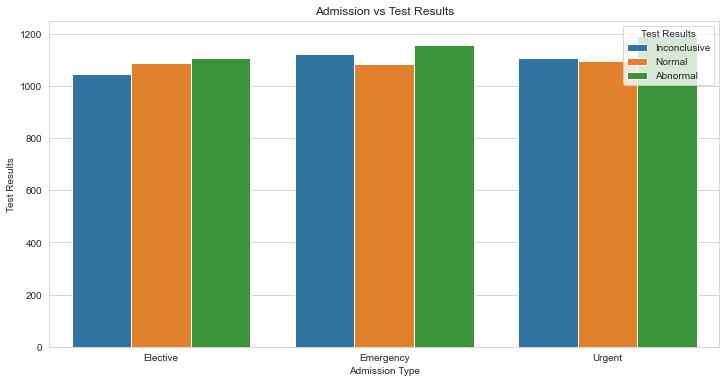

<Figure size 432x288 with 0 Axes>

In [15]:
plt.figure(figsize=(12,6))
sns.countplot(data=data, x='Admission Type', hue='Test Results')
plt.title("Admission vs Test Results")
plt.xlabel("Admission Type")
plt.ylabel("Test Results")
plt.show()
plt.savefig("img/Admission vs Test Results.png")

### Gender vs Admission Type

This bar chart compares the distribution of **admission types** between **male** and **female** patients.

Observations:

- Both genders have a similar overall distribution across Elective, Emergency, and Urgent admission types.
- **Female patients** have a slightly higher number of **Urgent admissions**, while **males** have a marginally higher number of **Emergency admissions**.
- The number of **Elective admissions** is roughly equal between genders.

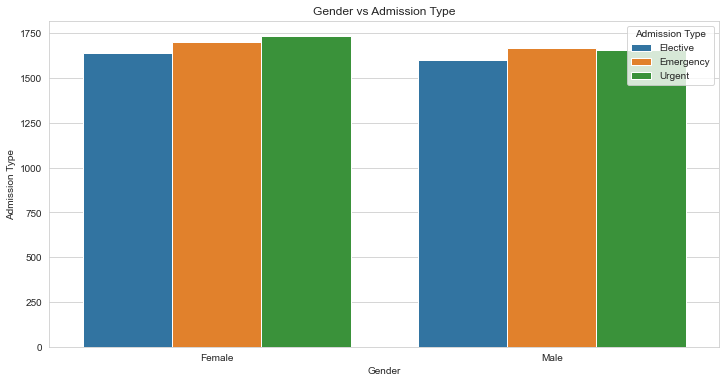

<Figure size 432x288 with 0 Axes>

In [17]:
plt.figure(figsize=(12,6))
sns.countplot(data=data, x='Gender', hue='Admission Type')
plt.title("Gender vs Admission Type")
plt.xlabel("Gender")
plt.ylabel("Admission Type")
plt.show()
plt.savefig("img/Gender vs Admission Type.png")

### Age Distribution by Admission Type and Test Results

This boxplot shows the age distribution across different **admission types** (Elective, Emergency, Urgent), further broken down by **test result categories** (Inconclusive, Normal, Abnormal).

Observations:

- The overall **age distribution is similar across all three admission types**, with median ages falling between **50 and 55 years**.
- Each admission type shows **comparable age patterns across test result groups**, indicating that **age is not a dominant factor** in determining the test outcome within a given admission context.
- **No significant skew or outliers** are observed in any specific combination of admission type and test result.

This analysis supports the earlier conclusion that neither age nor admission type alone explains the higher rate of abnormal test results in certain subgroups.  

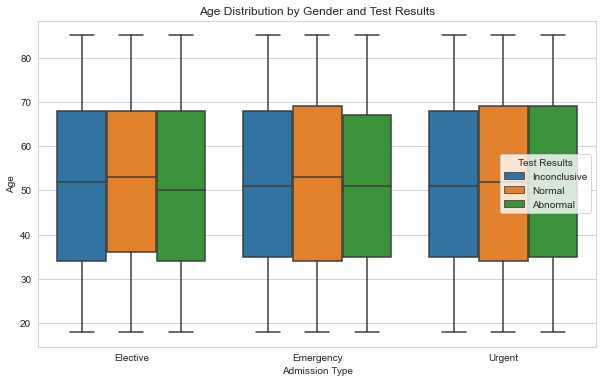

<Figure size 432x288 with 0 Axes>

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="Admission Type", y="Age", hue="Test Results")
plt.title("Age Distribution by Gender and Test Results")
plt.show()
plt.savefig("img/Age Distribution by Gender and Test Results.png")

### Blood Type vs Test Results

This bar chart illustrates the relationship between **Blood Type** and **Test Results**.

Observation:

- Among all blood types, **O- shows a noticeably higher number of abnormal test results** compared to other types.
- In previous visualizations, we observed that **male patients had a slightly higher count of O- blood type** cases than females.
- Combining these findings, it is plausible that the **elevated rate of abnormal test results among males** could be partially explained by a higher prevalence of the **O- blood group** within the male population.

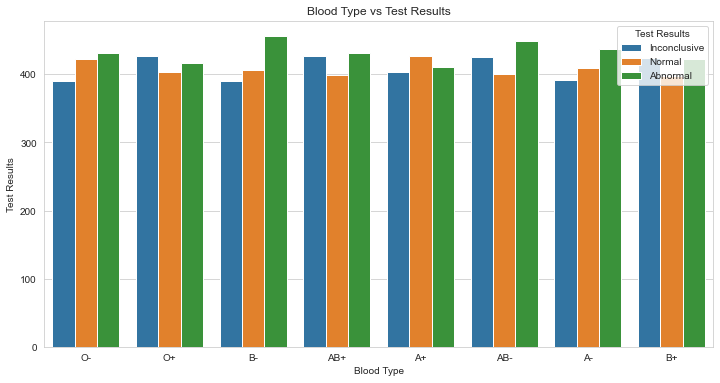

<Figure size 432x288 with 0 Axes>

In [19]:
plt.figure(figsize=(12,6))
sns.countplot(data=data, x='Blood Type', hue='Test Results')
plt.title("Blood Type vs Test Results")
plt.xlabel("Blood Type")
plt.ylabel("Test Results")
plt.show()
plt.savefig("img/Blood Type vs Test Results.png")

### Blood Type Distribution by Gender

This bar chart displays the distribution of different **blood types** across **female and male** patients.

Observation:

- The **O- blood type** appears significantly more common in **male** patients compared to females.
- As seen in the previous plot, the O- group also had one of the **highest counts of abnormal test results** across all blood types.
- This reinforces the hypothesis that the **higher abnormal test rate among male patients** may be partially influenced by the **overrepresentation of O- blood type** in the male population.

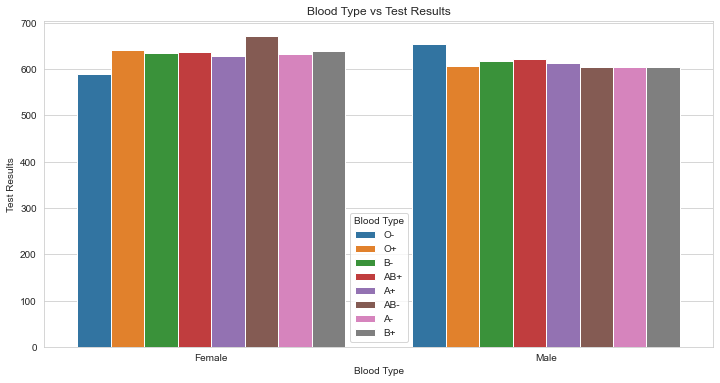

<Figure size 432x288 with 0 Axes>

In [20]:
plt.figure(figsize=(12,6))
sns.countplot(data=data, x='Gender', hue='Blood Type')
plt.title("Blood Type vs Test Results")
plt.xlabel("Blood Type")
plt.ylabel("Test Results")
plt.show()
plt.savefig("img/Blood Type vs Test Results.png")

### Age Group Distribution in Abnormal Test Results (by Gender)

In this analysis, we divided patients into five age groups:  
- **<30**, **30–45**, **45–60**, **60–75**, and **75+**

We then filtered for patients with **Abnormal** test results and examined the gender distribution within each age group.

Observations:

- The **45–60 age group** has the highest number of abnormal cases for both **males** and **females**.
- Surprisingly, the number of abnormal cases in the **<30 group** is **higher than in the 75+ group**, which challenges the common assumption that elderly individuals are more prone to abnormal test results.
- This finding suggests that **younger individuals may also be significantly affected by certain conditions**, potentially related to lifestyle, genetic factors, or early onset chronic diseases.

This motivates further analysis to explore **what types of diseases younger patients are more likely to be diagnosed with**, which could reveal patterns that contradict general clinical expectations.


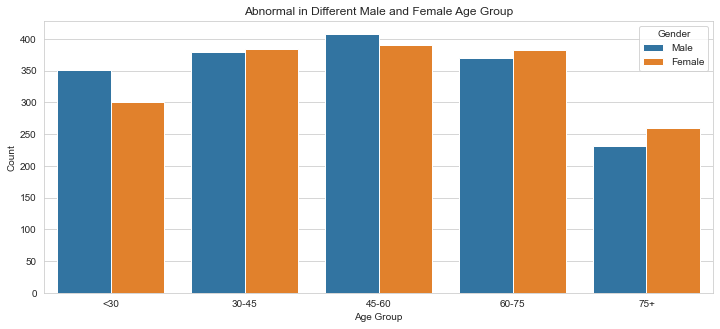

In [21]:
plt.figure(figsize=(12,5))
data["Age Group"] = pd.cut(data["Age"], bins=[0, 30, 45, 60, 75, 100],
                         labels=["<30", "30-45", "45-60", "60-75", "75+"])
sns.countplot(data=data[data["Test Results"] == "Abnormal"], x='Age Group', hue='Gender')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Abnormal in Different Male and Female Age Group')
plt.savefig("img/Abnormal in Different Male and Female Age Group.png")

### Abnormal Test Results by Age Group and Medical Condition

This chart shows the distribution of **abnormal test results** across different **age groups**, further broken down by **medical condition**.

Observation:

- In the **<30 age group**, the most common abnormal cases are linked to **Asthma** and **Hypertension**, suggesting that chronic conditions are affecting even younger patients.
- Among individuals aged **30–45**, **Arthritis** emerges as the leading medical condition associated with abnormal results.
- In the **45–60 group**, the frequency of abnormal results related to **Asthma**, **Arthritis**, and **Cancer** rises significantly, indicating this age range may be a critical risk window.
- For patients aged **60–75**, **Hypertension**, **Cancer**, and **Asthma** are the dominant conditions.
- In the **75+ group**, the overall case count is lower, but **Cancer** and **Hypertension** remain the leading contributors.

These patterns highlight that **different age groups are associated with different dominant risk factors**, which may reflect a combination of lifestyle factors, disease progression, and physiological changes with aging.

Such insights are valuable for:
- Tailoring early screening strategies
- Feature engineering in predictive models
- Designing age-specific healthcare interventions


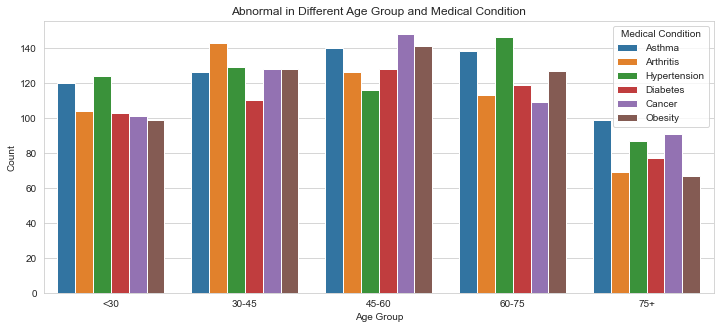

In [22]:
plt.figure(figsize=(12,5))
sns.countplot(data=data[data["Test Results"] == "Abnormal"], x='Age Group', hue='Medical Condition')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Abnormal in Different Age Group and Medical Condition')
plt.savefig("img/Abnormal in Different Age Group and Medical Condition.png")

In [24]:
#convert str type to datetime type
data['Date of Admission'] = pd.to_datetime(data['Date of Admission'])
data['Discharge Date'] = pd.to_datetime(data['Discharge Date'])

In [25]:
#only keep the days number
data['Stay Days'] = (data['Discharge Date'] - data['Date of Admission']).dt.days

In [26]:
#check is there is a wrong data (discharge date is earlier than admission date)
data[data['Stay Days'] < 0]

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Age Group,Stay Days


我们发现三种化验结果的住院时长在平均值为15左右，中位数时16，标准差在8左右浮动，并且样本平衡可信度较高

In [27]:
#calculate the mean, median, std and count of Test Results
data.groupby("Test Results")["Stay Days"].agg(["mean", "median", "std", "count"])

,mean,median,std,count
Test Results,,,,
Abnormal,15.688079,16.0,8.583560,3456
Inconclusive,15.472688,16.0,8.644392,3277
Normal,15.517600,15.0,8.610681,3267


我们可以知道大部分的病症都需要住院检查或者是治疗20天以上
### Hospital Stay Duration vs Test Results

This chart shows the distribution of **test results** across different **hospital stay duration groups**.

Observation:

- A significant portion of patients stayed in the hospital for **more than 20 days**, regardless of their test outcome.
- The **20+ days group** has the highest number of cases in Test Result.
- This suggests that many medical conditions in the dataset require **extended hospitalization**—either for in-depth diagnosis, ongoing treatment, or long-term monitoring.

Such a trend may reflect:
- The **complexity or severity** of conditions present in this population
- The healthcare system's preference for **inpatient observation**
- Or the nature of certain diseases that inherently require **prolonged care**

This insight is important for resource planning, patient risk stratification, and may also indicate that **"Stay Days" is a strong predictor** to consider in downstream modeling.

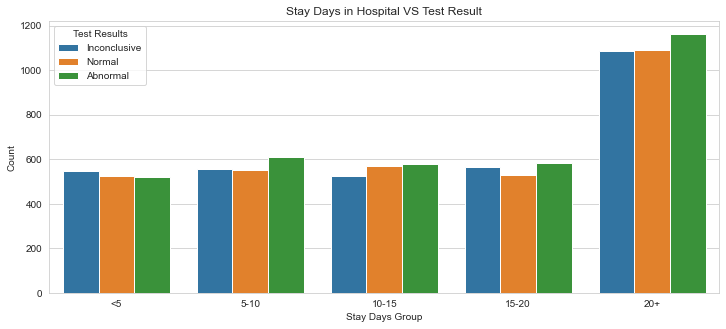

In [28]:
data["Stay Days Group"] = pd.cut(data["Stay Days"], bins=[0, 5, 10, 15, 20, 100],
                         labels=["<5", "5-10", "10-15", "15-20", "20+"])
plt.figure(figsize=(12,5))
sns.countplot(data=data,x='Stay Days Group',hue='Test Results')
plt.xlabel('Stay Days Group')
plt.ylabel('Count')
plt.title('Stay Days in Hospital VS Test Result')
plt.savefig("img/Stay Days in Hospital VS Test Result.png")

### Gender + Hospital Stay Duration vs Test Results

This heatmap illustrates how the combination of **gender** and **hospital stay duration** correlates with different **test result categories**.  
The color intensity represents the proportion of each test result type within each subgroup — **darker colors indicate stronger associations**.

Observation:

- **Male patients hospitalized for 5 to 20 days** exhibit a noticeably higher proportion of **Abnormal test results**, ranging from **35% to 37%**.
- In contrast, **female patients** in the same stay duration groups tend to have a more balanced distribution, with abnormal rates closer to **33%**.
- This gender difference may suggest that **male patients undergoing medium-length hospital stays** experience:
  - Higher clinical risk
  - More complex diagnostic or therapeutic processes
  - Or potentially lower recovery rates in that period

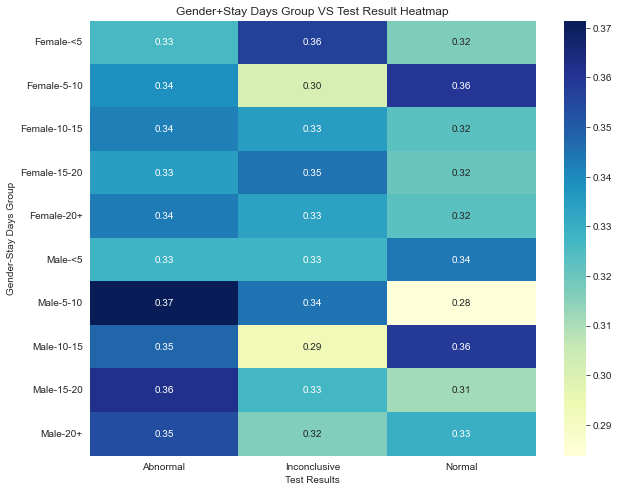

<Figure size 432x288 with 0 Axes>

In [29]:
crosstab = pd.crosstab([data["Gender"], data["Stay Days Group"]], data["Test Results"], normalize='index')
plt.figure(figsize=(10, 8))
sns.heatmap(crosstab, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Gender+Stay Days Group VS Test Result Heatmap")
plt.show()
plt.savefig("img/Gender+Stay Days Group VS Test Result Heatmap.png")

### Medical Condition + Hospital Stay Duration vs Test Results

This heatmap visualizes how the combination of **medical condition** and **hospital stay duration** correlates with different **test result categories**.

Observation:
- Patients diagnosed with **Asthma**, **Diabetes**, and **Hypertension** show the **highest proportions of abnormal test results** during **10–20 days of hospitalization**, reaching up to **38–40%**.  
  This suggests that the **middle-phase of hospitalization** may be a critical period for these conditions in terms of health deterioration or diagnostic sensitivity.

- Interestingly, the group **Cancer–15–20** shows a **40% share of Normal test results**, which stands out from other patterns.  
  A potential explanation is that patients with cancer may undergo **final-stage follow-up or recovery testing before discharge**, increasing the chance of normal results being recorded.

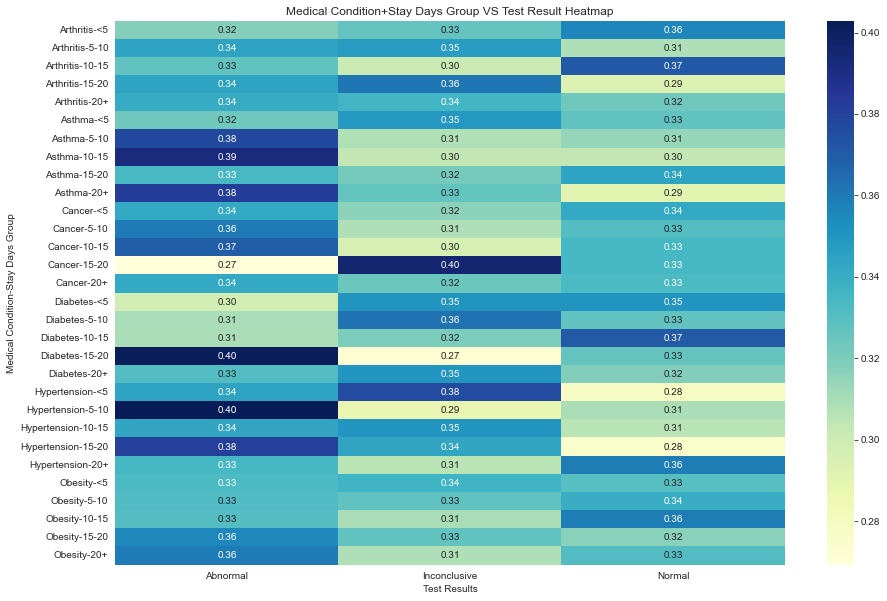

<Figure size 432x288 with 0 Axes>

In [30]:
crosstab = pd.crosstab([data["Medical Condition"], data["Stay Days Group"]], data["Test Results"], normalize='index')
plt.figure(figsize=(15, 10))
sns.heatmap(crosstab, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Medical Condition+Stay Days Group VS Test Result Heatmap")
plt.show()
plt.savefig("img/Medical Condition+Stay Days Group VS Test Result Heatmap.png")

The Billing of treating diabetes was the highest and arthritis was the lowest, which may be related to the price of the drug itself.

In [31]:
#calculate the Billing Amount of each Medical Condition

data.groupby("Medical Condition")["Billing Amount"].agg(["mean", "median", "count"]).sort_values('mean', ascending=False)

,mean,median,count
Medical Condition,,,
Diabetes,26060.116129,26162.203248,1623
Obesity,25720.842683,25365.022734,1628
Cancer,25539.096133,25610.641823,1703
Asthma,25416.869895,25073.451484,1708
Hypertension,25198.033973,24920.455173,1688
Arthritis,25187.631255,24739.166756,1650


### Billing Amount Distribution by Medical Condition (Boxplot)

This boxplot compares the **billing amount distribution** for different medical conditions, offering a deeper look into the **range, median, and variability** of healthcare costs.

Observations:

- **Diabetes** has the **highest median billing amount**, consistent with the summary table shown earlier. It also exhibits a relatively wide spread, indicating cost variability among patients.
- **Arthritis** and **Hypertension** show **lower medians** and slightly narrower interquartile ranges, suggesting these conditions are generally less expensive and more consistent in cost.
- All conditions display **significant cost variability**, with some cases reaching the upper limit of $50,000 — potentially due to complications, extended hospitalization, or intensive treatment protocols.
- The presence of **outliers and long upper whiskers** in every group indicates that **a small subset of patients incurs exceptionally high costs**, which may be important for identifying high-risk or high-cost cases.

These findings emphasize the value of using **statistical summaries and visualizations** together to gain a full picture of cost behavior across medical conditions — particularly when building billing prediction models or conducting cost optimization analysis.


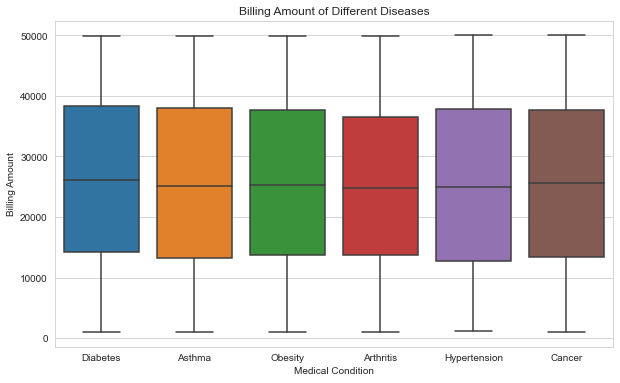

In [32]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data, x="Medical Condition", y="Billing Amount")
plt.xlabel('Medical Condition')
plt.ylabel('Billing Amount')
plt.title('Billing Amount of Different Diseases')
plt.savefig("img/Billing Amount of Different Diseases.png")

### Average Billing Amount by Medication

observation
- **Lipitor** has the **highest average billing amount**, followed by **Aspirin** and **Ibuprofen**.
- Lipitor is commonly used in the treatment of **Diabetes**, which we previously identified as the **most expensive medical condition** in terms of treatment cost.
- This helps explain why Diabetes incurs higher costs — not only due to the **medication itself**, but also due to associated factors such as:
  - **Longer hospitalization periods** (as observed in previous analyses, often 15–20 days)
  - **Ongoing monitoring and follow-up**
  - **Co-occurring conditions** requiring combination treatments

In [33]:
data.groupby('Medication')['Billing Amount'].agg(['mean','median','count']).sort_values('mean', ascending=False)

,mean,median,count
Medication,,,
Lipitor,26126.263179,26153.389223,2015
Aspirin,25795.641295,25541.652751,1968
Ibuprofen,25439.097865,25081.284280,1976
Paracetamol,25145.410639,24995.508981,1962
Penicillin,25086.518686,24893.814096,2079


### 3 Feature engineering

In [34]:
data.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results', 'Age Group', 'Stay Days',
       'Stay Days Group'],
      dtype='object')

Age	Gender	Blood Type	Medical Condition	Insurance Provider	Billing Amount	Admission Type	Medication

In [35]:
# dataset = data.drop(columns=['Name','Age','Date of Admission','Doctor','Hospital','Room Number','Discharge Date','Stay Days'])
dataset = data.drop(columns=['Name','Date of Admission','Doctor','Hospital','Room Number','Discharge Date','Age Group', 'Stay Days Group'])

In [36]:
dataset.head()

,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Admission Type,Medication,Test Results,Stay Days
0,81,Female,O-,Diabetes,Medicare,37490.983364,Elective,Aspirin,Inconclusive,14
1,35,Male,O+,Asthma,UnitedHealthcare,47304.064845,Emergency,Lipitor,Normal,14
2,61,Male,B-,Obesity,Medicare,36874.896997,Emergency,Lipitor,Normal,30
3,49,Male,B-,Asthma,Medicare,23303.322092,Urgent,Penicillin,Abnormal,1
4,51,Male,O-,Arthritis,UnitedHealthcare,18086.344184,Urgent,Paracetamol,Normal,24


#### Here we define our task, which is Test Result multi-class prediction

In [37]:
#Define the label
label = 'Test Results'

#Numerical features
num_fea = ['Age','Stay Days', 'Billing Amount']

#Category features
cat_fea = [f for f in dataset.columns if f not in num_fea and f != label]

In [38]:
print(num_fea)
print(cat_fea)

['Age', 'Stay Days', 'Billing Amount']
['Gender', 'Blood Type', 'Medical Condition', 'Insurance Provider', 'Admission Type', 'Medication']


In [43]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

def encode_categorical_features(df, categorical_cols, numerical_cols):
    
    df_encoded = df.copy()
    categorical_feature = pd.DataFrame()
    encoders = {}
    scaler = StandardScaler()

    for col in categorical_cols:
        le = LabelEncoder()
        categorical_feature[col] = le.fit_transform(df[col].astype(str))  # ensure the string
        encoders[col] = le
    
    numerical_feature = pd.DataFrame(scaler.fit_transform(df[numerical_cols]), 
                              columns=numerical_cols)
    return encoders,scaler, categorical_feature, numerical_feature 

In [44]:
cate_encoders, num_encoder, cate_encoded, num_encoded = encode_categorical_features(dataset,cat_fea, num_fea)

In [45]:
cate_encoders

{'Gender': LabelEncoder(),
 'Blood Type': LabelEncoder(),
 'Medical Condition': LabelEncoder(),
 'Insurance Provider': LabelEncoder(),
 'Admission Type': LabelEncoder(),
 'Medication': LabelEncoder()}

In [46]:
num_encoder

StandardScaler()

In [47]:
cate_encoded.head()

,Gender,Blood Type,Medical Condition,Insurance Provider,Admission Type,Medication
0,0,7,3,3,0,0
1,1,6,1,4,1,2
2,1,5,5,3,1,2
3,1,5,1,3,2,4
4,1,7,0,4,2,3


In [48]:
num_encoded.head()

,Age,Stay Days,Billing Amount
0,1.508465,-0.181360,0.851249
1,-0.839912,-0.181360,1.548866
2,0.487431,1.676598,0.807452
3,-0.125189,-1.690950,-0.157358
4,-0.023086,0.979864,-0.528235


In [49]:
#Concat features
label_encoder = LabelEncoder()
X = pd.concat([cate_encoded, num_encoded], axis = 1)
y = label_encoder.fit_transform(dataset[label])

In [50]:
label_encoder.classes_

array(['Abnormal', 'Inconclusive', 'Normal'], dtype=object)

我们发现特征之间的关系非常不明朗，特征与特征之间相互独立，这会导致后续的模型训练和预测增加困难

<AxesSubplot:>

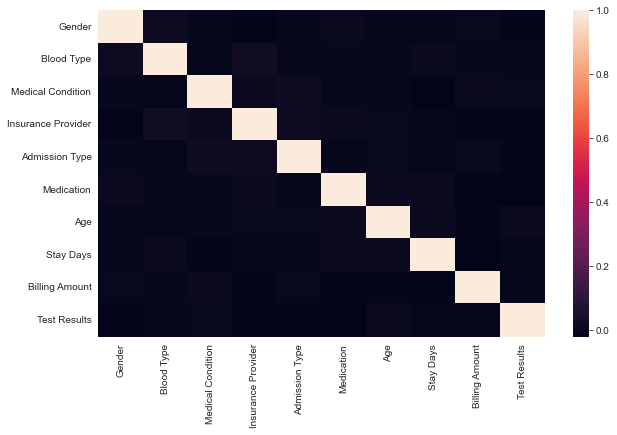

In [129]:
#Plot heatmap of feature correlation
plt.figure(figsize=(10,6))
corr_df = pd.concat([cat_encoded, num_scaled, pd.DataFrame(y, columns=["Test Results"])], axis=1)
sns.heatmap(corr_df.corr())
plt.savefig("img/Billing Amount of Different Diseases.png")

In [130]:
X.shape, y.shape

((10000, 9), (10000,))

In [131]:
y

array([1, 2, 2, ..., 2, 2, 0])

In [132]:
X

,Gender,Blood Type,Medical Condition,Insurance Provider,Admission Type,Medication,Age,Stay Days,Billing Amount
0,0,7,3,3,0,0,1.508465,-0.181360,0.851249
1,1,6,1,4,1,2,-0.839912,-0.181360,1.548866
2,1,5,5,3,1,2,0.487431,1.676598,0.807452
3,1,5,1,3,2,4,-0.125189,-1.690950,-0.157358
4,1,7,0,4,2,3,-0.023086,0.979864,-0.528235
...,...,...,...,...,...,...,...,...,...
9995,1,0,5,4,0,1,1.610568,-1.342583,1.001667
9996,0,2,0,1,1,1,-0.227292,0.863741,-1.387763
9997,1,5,0,1,0,1,0.130069,-0.181360,1.709184
9998,1,0,0,4,2,4,1.661620,0.515374,-0.019938


### 4 Application 

### 4.1 Feature selection / Dimension reduction via LightGBM

In [133]:
#Split training set and validation set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [134]:
#Use lightgbm to select features
from lightgbm import LGBMClassifier
lightgbm = LGBMClassifier()
lightgbm.fit(X_train,y_train)
features = X.columns
feature_importances = lightgbm.feature_importances_

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000093 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 384
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 9
[LightGBM] [Info] Start training from score -1.067841
[LightGBM] [Info] Start training from score -1.108284
[LightGBM] [Info] Start training from score -1.120475


### Select the importance features

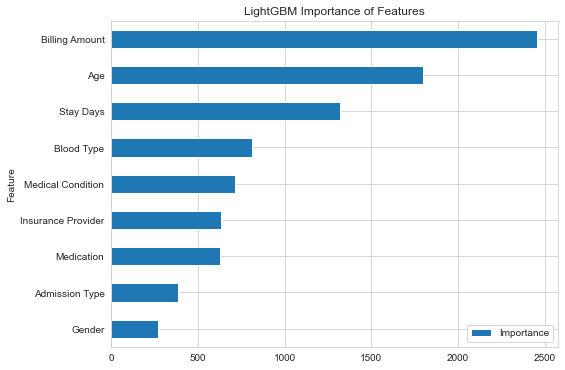

In [242]:
#Save in a dataframe
fi_df = pd.DataFrame({
    "Feature": features,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)

#Plot important features
fi_df.plot(kind="barh", x="Feature", y="Importance", figsize=(8, 6))
plt.title("LightGBM Importance of Features")
plt.gca().invert_yaxis()
plt.show()

In [144]:
#Dimensional reduction to top 5 features
dr_X = X[['Billing Amount', 'Age', 'Stay Days', 'Blood Type', 'Medical Condition']]

In [145]:
dr_X.head()

,Billing Amount,Age,Stay Days,Blood Type,Medical Condition
0,0.851249,1.508465,-0.181360,7,3
1,1.548866,-0.839912,-0.181360,6,1
2,0.807452,0.487431,1.676598,5,5
3,-0.157358,-0.125189,-1.690950,5,1
4,-0.528235,-0.023086,0.979864,7,0


In [198]:
#New training data
X_train, X_test, y_train, y_test = train_test_split(dr_X, y, test_size = 0.2, random_state=42)

### 4.2 Model selection

In [199]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#model dict to storage different algorithm
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Neural Network":MLPClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

In [200]:
from sklearn.metrics import classification_report
results = {}

#train model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = classification_report(y_test, y_pred, target_names=le.classes_, output_dict=True)

In [201]:
# Save the f1-score and accuracy metrics into a dataframe
f1_df = pd.DataFrame({name: pd.DataFrame(rep).T["f1-score"]
                      for name, rep in results.items()})
accuracy_df = pd.DataFrame({name: rep["accuracy"]
                            for name, rep in results.items()}, index=["Accuracy"]).T

### Model Performance (Before Hyperparameter Tuning)

The table above displays the classification performance of six machine learning models **prior to any hyperparameter tuning**.

#### Key metrics included:
- **Class-wise F1-score** (Abnormal, Inconclusive, Normal)
- **Accuracy**: Overall classification correctness
- **Macro average**: Unweighted average F1-score across all classes
- **Weighted average**: Class-frequency-weighted average F1-score

#### Observations:

- **Support Vector Machine (SVM)** achieved the **highest F1-score for the 'Abnormal' class (0.4867)**, but struggled with other classes, especially 'Inconclusive' and 'Normal'.
- **Logistic Regression** severely underperformed on the 'Normal' class (0.0120), suggesting it failed to separate that class at all.
- **Decision Tree and Random Forest** demonstrated **balanced performance across all classes**, though without standout precision in any one area.
- **K-Nearest Neighbors (KNN)** had **solid and more consistent macro/weighted averages (≈0.32)** compared to most models.
- **Neural Network (MLPClassifier)** delivered a reasonably balanced outcome, showing potential for improvement with tuning.

In [202]:
f1_df

,Logistic Regression,K-Nearest Neighbors,Support Vector Machine,Neural Network,Decision Tree,Random Forest
Abnormal,0.471396,0.406739,0.486679,0.392005,0.365976,0.353347
Inconclusive,0.250217,0.323185,0.182011,0.311278,0.349845,0.292607
Normal,0.012048,0.240303,0.122042,0.273458,0.325439,0.304897
accuracy,0.331500,0.336000,0.341500,0.332000,0.347500,0.318500
macro avg,0.244554,0.323409,0.263577,0.325581,0.347087,0.316950
weighted avg,0.249936,0.325411,0.269829,0.327332,0.347510,0.318092


In [203]:
accuracy_df.sort_values('Accuracy', ascending=False)

,Accuracy
Decision Tree,0.3475
Support Vector Machine,0.3415
K-Nearest Neighbors,0.3360
Neural Network,0.3320
Logistic Regression,0.3315
Random Forest,0.3185


### 4.3 Hyperparameter optimization

In [243]:
param_grids = {
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=1000),
        'params': {
            'C': [0.01, 0.1, 1, 10],
            'penalty': ['l2'],
            'solver': ['lbfgs']
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance']
        }
    },
    'SVM': {
        'model': SVC(),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['rbf', 'linear'],
            'gamma': ['scale', 'auto']
        }
    },
     'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'max_depth': [3, 5, 10, None],
            'min_samples_split': [2, 5, 10],
            'criterion': ['gini', 'entropy']
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [50, 100],
            'max_depth': [5, 10, None],
            'min_samples_split': [2, 5],
            'max_features': ['sqrt', 'log2']
        }
    },
    'Neural Network': {
        'model': MLPClassifier(max_iter=500),
        'params': {
            'hidden_layer_sizes': [(50,), (100,), (100, 50)],
            'activation': ['relu', 'tanh'],
            'alpha': [0.0001, 0.001],
            'solver': ['adam']
        }
    }    
}

In [206]:
# Use gridsearch to fine the best hyperparameter
from sklearn.model_selection import GridSearchCV

params_results = []

for name, mp in param_grids.items():
    grid = GridSearchCV(mp['model'], mp['params'], cv=3, scoring='f1_macro', n_jobs=1)
    grid.fit(X_train, y_train)
    params_results.append({
        'Model': name,
        'Best Params': grid.best_params_,
        'Best F1 Score': grid.best_score_
    })

In [207]:
# Storage the hyperparameter into a df
result_df = pd.DataFrame(params_results).sort_values('Best F1 Score', ascending=False)
result_df

,Model,Best Params,Best F1 Score
3,Decision Tree,"{'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 10}",0.342364
4,Random Forest,"{'max_depth': None, 'max_features': 'log2', 'min_samples_split': 5, 'n_estimators': 50}",0.337317
5,Neural Network,"{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 50), 'solver': 'adam'}",0.328622
1,KNN,"{'n_neighbors': 7, 'weights': 'distance'}",0.326137
2,SVM,"{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}",0.325557
0,Logistic Regression,"{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}",0.276221


In [208]:
pd.set_option('max_colwidth',100)
result_df.iloc[:,:2]

,Model,Best Params
3,Decision Tree,"{'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 10}"
4,Random Forest,"{'max_depth': None, 'max_features': 'log2', 'min_samples_split': 5, 'n_estimators': 50}"
5,Neural Network,"{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 50), 'solver': 'adam'}"
1,KNN,"{'n_neighbors': 7, 'weights': 'distance'}"
2,SVM,"{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}"
0,Logistic Regression,"{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}"


### 4.4 Model ensemble

In [209]:
# Set the best hyperparameter
best_KNN = KNeighborsClassifier(n_neighbors=7, weights='uniform')
best_DT = DecisionTreeClassifier(criterion='entropy', max_depth=None, min_samples_split=2)
best_NN = MLPClassifier(activation='tanh', alpha=0.001, hidden_layer_sizes={100,50}, solver='adam')
best_RF = RandomForestClassifier(max_depth=None, max_features='log2', min_samples_split=2, n_estimators=100)
best_svm = SVC(C=10, gamma='auto', kernel='rbf')
best_LR = LogisticRegression(C=1, penalty='l2', solver='lbfgs')

In [210]:
# Use the voting method to get the best results 
from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(
    estimators=[
        ('KNN', best_KNN),
        ('DT', best_DT),
        ('NN', best_NN),
        ('RF', best_RF),
        ('SVM', best_svm),
        ('LR', best_LR)
    ],
    voting='hard' 
)

In [211]:
# Compare the ensemble model with other model
models = {
    "Logistic Regression": best_LR,
    "K-Nearest Neighbors": best_KNN,
    "Support Vector Machine": best_svm,
    "Neural Network": best_NN,
    "Decision Tree": best_DT,
    "Random Forest": best_RF,
    "Ensemble": ensemble
}

In [212]:
#retrain model with best params
best_results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    best_results[name] = classification_report(y_test, y_pred, target_names=le.classes_, output_dict=True)

In [213]:
# Save the f1-score and accuracy metrics into a dataframe
best_f1_df = pd.DataFrame({name: pd.DataFrame(rep).T["f1-score"]
                      for name, rep in best_results.items()})
best_accuracy_df = pd.DataFrame({name: rep["accuracy"]
                            for name, rep in best_results.items()}, index=["Accuracy"]).T


尽管使用了多种模型尝试对 Test Results 进行分类，但模型性能普遍较低（F1-score ≈ 30%）。这是由于：

- 化验结果存在主观性与不确定性，尤其是 Inconclusive 类别；

- 结构化特征与检测结果之间缺乏直接因果联系；

- 一些重要医学信息未在当前数据中体现。

### Model Performance After Hyperparameter Tuning + Ensemble Model

The table above presents the classification performance of individual models using their **best hyperparameters (via GridSearchCV)** and compares them to an **Ensemble model** built from selected base learners.

Observations:

- **Improvements after tuning** are evident for most models, especially:
  - **Logistic Regression**, which maintained strong performance for the 'Abnormal' class (0.471) but still struggles on 'Normal' (0.012).
  - **K-Nearest Neighbors** and **SVM** now show more **balanced class-wise performance**, with better macro and weighted F1-scores.
  - **Random Forest** remains consistent, showing good class-wise stability and strong average metrics.

- The **Neural Network** shows significant improvement for the 'Inconclusive' class (0.42), though performance on 'Normal' is still weak.

- The **Ensemble Model** achieves:
  - **Strong performance on 'Abnormal' (0.4176)**, competitive with the top base learners
  - **Good balance overall**, though not outperforming the best individual models on all metrics
  - **Macro Avg: 0.317**, **Weighted Avg: 0.320**, close to top performers

In [214]:
best_f1_df

,Logistic Regression,K-Nearest Neighbors,Support Vector Machine,Neural Network,Decision Tree,Random Forest,Ensemble
Abnormal,0.471396,0.392132,0.373016,0.262681,0.340959,0.377282,0.417620
Inconclusive,0.250217,0.314128,0.313349,0.422507,0.354814,0.298343,0.254346
Normal,0.012048,0.288678,0.308812,0.167816,0.312217,0.315789,0.279551
accuracy,0.331500,0.337500,0.334500,0.323000,0.336000,0.333000,0.333000
macro avg,0.244554,0.331646,0.331726,0.284335,0.335997,0.330471,0.317172
weighted avg,0.249936,0.333290,0.332919,0.282295,0.335909,0.331948,0.320274


In [215]:
best_accuracy_df.sort_values('Accuracy', ascending=False)

,Accuracy
K-Nearest Neighbors,0.3375
Decision Tree,0.3360
Support Vector Machine,0.3345
Random Forest,0.3330
Ensemble,0.3330
Logistic Regression,0.3315
Neural Network,0.3230


In [522]:
# Save the model, encoder and feature to local and then do model deployment
import joblib
import os

feature_names = X_train.columns.tolist()
if not os.path.exists('./app/data'):
    os.makedirs('./app/data')
else:
    joblib.dump(ensemble, "./app/data/ensemble_model.pkl")
    joblib.dump(encoders, "./app/data/categorical_encoder.pkl")
    joblib.dump(label_encoder, "./app/data/label_encoder.pkl")
    joblib.dump(feature_names, './app/data/feature_names.pkl')

## Summary: Multi-Class Classification of Medical Test Results

This project aimed to build predictive models for classifying patient **test results** (`Abnormal`, `Normal`, `Inconclusive`) based on demographic, medical, and hospitalization data. The end-to-end process included:

### Key Steps:
1. **Exploratory Data Analysis (EDA)**:
   - Assessed label distribution, missing values, and categorical feature distributions.
   - Analyzed feature interactions: gender, age, stay days, medical condition, and blood type vs. test results.

2. **Feature Engineering**:
   - Created categorical groupings (age bins, stay days group).
   - Constructed cross-features (e.g., Gender + Stay Group, Condition + Stay Group).
   - Applied both one-hot and label encoding to categorical features.

3. **Model Development**:
   - Trained baseline models: Logistic Regression, KNN, SVM, Neural Network, Decision Tree, Random Forest.
   - Performed hyperparameter tuning via GridSearchCV.
   - Built an **ensemble model** combining top learners for improved balance and robustness.

4. **Cost & Risk Analysis**:
   - Explored billing amounts across diseases and medications.
   - Investigated risk patterns by age, gender, and condition in relation to abnormal test outcomes.

---

## Why Is Accuracy Low?

Despite extensive preprocessing and model optimization, **accuracy remained around 33–34%**, only slightly above random guessing in a 3-class setting. This is likely due to several **real-world data challenges**:

### 1. **Class Overlap**
- The features available (e.g., gender, age, condition) may not clearly separate classes.
- Patients with similar demographics and diagnoses can fall into any of the three test result categories, limiting model discriminative power.

### 2. **Label Ambiguity / Noise**
- The target variable (`Test Results`) includes an `Inconclusive` class, which is inherently **noisy or uncertain**.
- Some results may not reflect true clinical differences, making the learning task fuzzier.

### 3. **Feature Limitations**
- Many features are high-level and categorical (e.g., condition, medication) without detailed clinical context (e.g., lab values, severity scores).
- Lack of numeric diagnostic markers reduces the model's ability to learn precise patterns.

### 4. **Non-linear Complexity**
- Underlying relationships between inputs and outputs may be **non-linear and multi-modal**, which simpler models (Logistic Regression, KNN) cannot fully capture.

---

## Final Remarks

While model performance is modest, the analysis offers valuable insights into:
- Patient risk profiles across age, gender, and hospital stay duration
- Cost implications by disease and medication
- Feature interaction effects via heatmaps and group-level exploration

The **ensemble model** delivers the best overall balance and can serve as a baseline for future work involving:
- More granular clinical data (e.g., lab results, doctor notes)
- Deep learning models (e.g., tabular transformers)
- Interpretability tools (e.g., SHAP, LIME)

This project demonstrates a **comprehensive pipeline** for structured medical data modeling, balancing technical depth with practical clinical relevance.